# Imports

In [44]:
import os.path as osp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from generate_data import linear_approx, rational_approx, loss, x_3, module_x, sin

# 1D

In [45]:
data = pd.read_csv('task2_1d.csv')
FUNC_NAMES = {'x_3': r'$x^3$', 'module_x': r'$|x - 2|$', 'sin': r'$x\sin({{1} \over {x}})$'}
data

,optimizer,func,min,func_min,iterations
0,brute_force,x_3,0.000000,0.000000e+00,1000
1,brute_force,module_x,0.200000,0.000000e+00,1000
2,brute_force,sin,0.223000,-2.172246e-01,900
3,dichotomy,x_3,0.001482,3.255319e-09,22
4,dichotomy,module_x,0.201089,1.089233e-03,22
5,dichotomy,sin,0.223509,-2.171930e-01,22
6,golden_section,x_3,0.001100,1.329934e-09,17
7,golden_section,module_x,0.200806,8.064512e-04,17
8,golden_section,sin,0.223253,-2.172117e-01,17


## Visualize data

In [46]:
plt.rcParams["figure.figsize"] = (10, 10)

/content/generate_data.py:21: RuntimeWarning: divide by zero encountered in true_divide
  return array * np.sin(1 / array)
/content/generate_data.py:21: RuntimeWarning: invalid value encountered in sin
  return array * np.sin(1 / array)


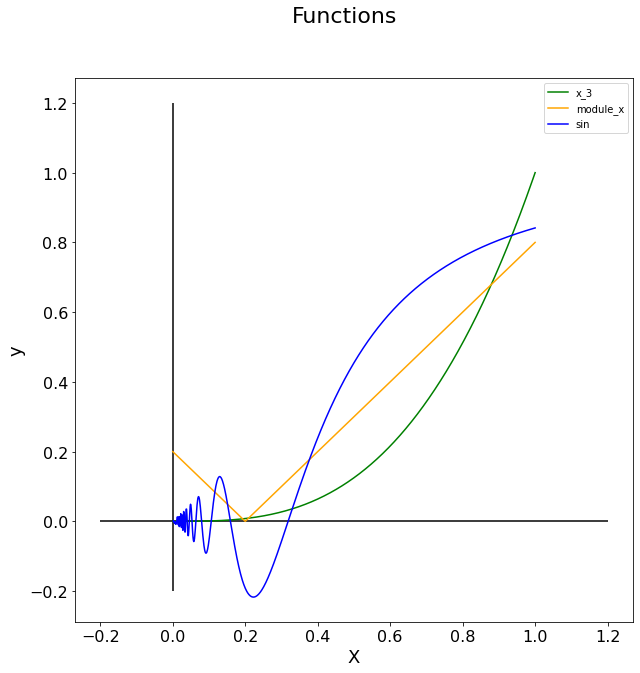

In [47]:
X = np.arange(0, 1.001, 0.001)
for func, color in zip(("x_3", "module_x", "sin"),
                        ("green", "orange", "blue")):
    y = eval(func)(X)
    plt.plot(X, y, color=color, label=func)
plt.vlines(0, -0.2, 1.2, colors='black')
plt.hlines(0, -0.2, 1.2, colors='black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('X', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.suptitle('Functions', fontsize=22)
plt.legend()
plt.plot();

In [48]:
plt.rcParams["figure.figsize"] = (8, 5)

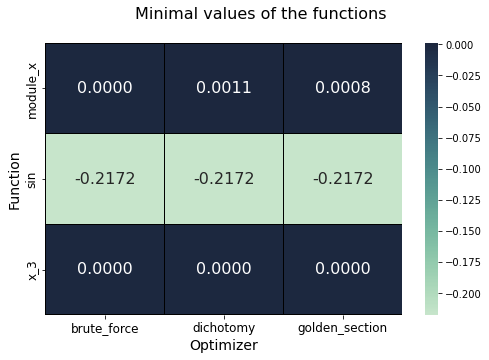

In [49]:
cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
sns.heatmap(data.pivot(index='func', columns='optimizer', values='func_min'), 
            annot=True,annot_kws={"size": 16}, fmt='.4f', cmap=cmap, linewidths=0.1, linecolor='black', )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Optimizer', fontsize=14)
plt.ylabel('Function', fontsize=14)
plt.suptitle('Minimal values of the functions', fontsize=16);

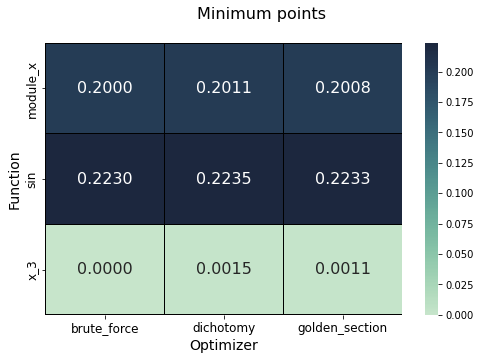

In [50]:
cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
sns.heatmap(data.pivot(index='func', columns='optimizer', values='min'), 
            annot=True,annot_kws={"size": 16}, fmt='.4f', cmap=cmap, linewidths=0.1, linecolor='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Optimizer', fontsize=14)
plt.ylabel('Function', fontsize=14)
plt.suptitle('Minimum points', fontsize=16);

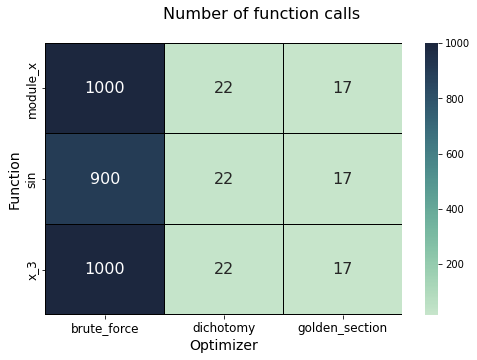

In [51]:
sns.heatmap(data.pivot(index='func', columns='optimizer', values='iterations'), 
            annot=True,annot_kws={"size": 16}, fmt='d', cmap=cmap, linewidths=0.1, linecolor='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Optimizer', fontsize=14)
plt.ylabel('Function', fontsize=14)
plt.suptitle('Number of function calls', fontsize=16);

# 2D

In [52]:
plt.rcParams["figure.figsize"] = (10, 10)
METHODS = {'brute_force_opt': 'Brute Force',
           'gauss_opt': 'Gauss', 
           'nelder_mead_opt': 'Nelder-Mead'}

In [53]:
# Ground-truth values
alpha = 0.6121701756176187 
beta = 0.16906975434563642

opt_data = pd.read_csv('task2_data_2d.csv')
approx = pd.read_csv('task2_2d.csv')
approx.sort_values(['approx_func', 'method'])

,method,approx_func,loss,a,b,iterations
0,brute_force_opt,linear_approx,93.209329,0.782000,0.087000,16008001
2,gauss_opt,linear_approx,93.209392,0.782780,0.087650,601
4,nelder_mead_opt,linear_approx,93.209325,0.782354,0.087127,129
1,brute_force_opt,rational_approx,94.753987,0.299000,-0.661000,16008001
3,gauss_opt,rational_approx,94.755678,0.303312,-0.653382,521
5,nelder_mead_opt,rational_approx,94.753986,0.298963,-0.660779,101


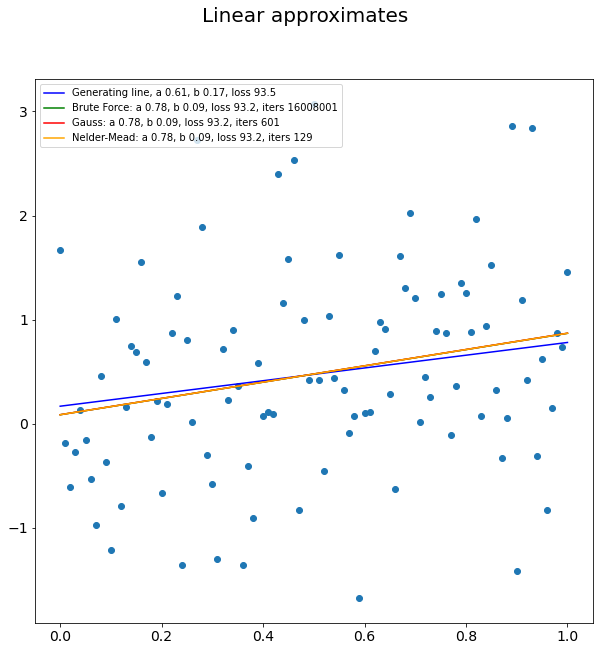

In [54]:
plt.scatter(opt_data['X'], opt_data['y'])
true_loss = loss(linear_approx, opt_data['X'], alpha, beta, opt_data['y'])
plt.plot(opt_data['X'], opt_data['y_clean'], c='blue', label=f'Generating line, a {alpha:.2f}, b {beta:.2f}, loss {true_loss:.1f}')
for method, color in zip(['brute_force_opt', 'gauss_opt', 'nelder_mead_opt'],
                         ['green', 'red', 'orange']):
    row = approx[(approx['method'] == method) & (approx['approx_func'] == 'linear_approx')]
    a, b = row['a'].values[0], row['b'].values[0]
    y_pred = linear_approx(opt_data['X'], a, b)
    loss_value = row['loss'].values[0]
    iters = row['iterations'].values[0]
    plt.plot(opt_data['X'], y_pred, c=color, label=f'{METHODS[method]}: a {a:.2f}, b {b:.2f}, loss {loss_value:.1f}, iters {iters}')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.suptitle('Linear approximates', fontsize=20)
plt.show();

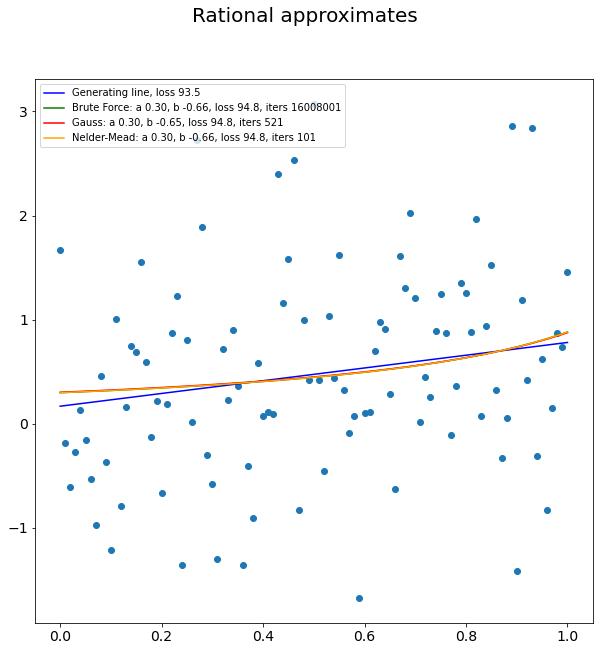

In [55]:
plt.scatter(opt_data['X'], opt_data['y'])
true_loss = loss(linear_approx, opt_data['X'], alpha, beta, opt_data['y'])
plt.plot(opt_data['X'], opt_data['y_clean'], c='blue', label=f'Generating line, loss {true_loss:.1f}')
for method, color in zip(['brute_force_opt', 'gauss_opt', 'nelder_mead_opt'],
                         ['green', 'red', 'orange']):
    row = approx[(approx['method'] == method) & (approx['approx_func'] == 'rational_approx')]
    a, b = row['a'].values[0], row['b'].values[0]
    y_pred = rational_approx(opt_data['X'], a, b)
    loss_value = row['loss'].values[0]
    iters = row['iterations'].values[0]
    plt.plot(opt_data['X'], y_pred, c=color, label=f'{METHODS[method]}: a {a:.2f}, b {b:.2f}, loss {loss_value:.1f}, iters {iters}')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.suptitle('Rational approximates', fontsize=20)
plt.show();